    1. Data preprocessing

In [21]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

#import data
bots_data = pd.read_csv('bots_data.csv')
nonbots_data = pd.read_csv('nonbots_data.csv')
# concatenate bots and nonbots
df = pd.concat([bots_data, nonbots_data])
df.head(5)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.982732e+09,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,0,False,23557,en,"{'retweeted': False, 'is_quote_status': False,...",False,False,False,McGucket bot,1
1,8.410000e+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,0,False,1,en,Status(_api=<tweepy.api.API object at 0x101927...,True,True,False,MJ Kuhn,1
2,2.768375e+09,2768374981,ducknoteprice,NaN,NaN,NaN,3,0,3,Mon Aug 25 23:17:59 +0000 2014,0,False,1050,en,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...,True,False,False,duckNote,1
3,3.304189e+09,3304189373,robotrecipes,robot kitchen,tasty recipes for robot // not for human // a ...,http://t.co/PdagJGqVMR,505,13,49,Sat May 30 23:42:16 +0000 2015,0,False,5109,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,robot recipes,1
4,3.224289e+09,3224289024,everyumlaut,NaN,bot by @dbaker_h,NaN,15,0,11,Sat May 23 14:39:21 +0000 2015,0,False,31365,en-gb,"{u'contributors': None, u'truncated': False, u...",True,False,False,��v��r�� �_ml�_�_���,1


In [22]:
# feature projection
df = df[['followers_count','friends_count','listedcount','favourites_count','verified','statuses_count','default_profile','default_profile_image','bot']]
df.head(5)

,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot
0,1129,7,2,0,False,23557,False,False,1
1,0,22,0,0,False,1,True,True,1
2,3,0,3,0,False,1050,True,False,1
3,505,13,49,0,False,5109,False,False,1
4,15,0,11,0,False,31365,True,False,1


In [5]:
#convert boolean features to integer
df['verified'] = df['verified'].astype(int)
df['default_profile'] = df['default_profile'].astype(int)
df['default_profile_image'] = df['default_profile_image'].astype(int)
df.head(5)

,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot
0,1129,7,2,0,0,23557,0,0,1
1,0,22,0,0,0,1,1,1,1
2,3,0,3,0,0,1050,1,0,1
3,505,13,49,0,0,5109,0,0,1
4,15,0,11,0,0,31365,1,0,1


In [6]:
#data normalization(to [0:1])
x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head(5)

/Users/mengmeng/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


,0,1,2,3,4,5,6,7,8
0,1.172116e-05,0.000007,0.000009,0.0,0.0,3.432282e-03,0.0,0.0,1.0
1,0.000000e+00,0.000022,0.000000,0.0,0.0,1.457012e-07,1.0,1.0,1.0
2,3.114567e-08,0.000000,0.000013,0.0,0.0,1.529862e-04,1.0,0.0,1.0
3,5.242855e-06,0.000013,0.000220,0.0,0.0,7.443873e-04,0.0,0.0,1.0
4,1.557284e-07,0.000000,0.000049,0.0,0.0,4.569917e-03,1.0,0.0,1.0


    2. Train knn, svm classifiers and evaluate them using k-fold cross-validation

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


kf = KFold(n_splits=10, shuffle=True)
X = df[df.columns[0:8]]
y = df[df.columns[8]]
# for neighbor_number in range(3,20):
accuracy_knn = 0
accuracy_svm = 0
precision_knn = 0
precision_svm = 0
recall_knn = 0
recall_svm = 0
f1score_knn = 0
f1score_svm = 0
auc_knn = 0
auc_svm = 0
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.ix[train_index,:], X.ix[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    knn_classifier = KNeighborsClassifier(n_neighbors=10)
    knn_classifier.fit(X_train, y_train)
    pred_knn = knn_classifier.predict(X_test)

    svm_classifier = svm.SVC()
    svm_classifier.fit(X_train, y_train)
    pred_svm = svm_classifier.predict(X_test)

    accuracy_knn = accuracy_knn + np.mean(pred_knn == y_test)
    accuracy_svm = accuracy_svm + np.mean(pred_svm == y_test)

    precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred_knn, average = 'binary', pos_label = 1)
    precision_knn = precision_knn + precision
    recall_knn = recall_knn + recall
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred_svm, average = 'binary', pos_label = 1)
    precision_svm = precision_svm + precision
    recall_svm = recall_svm + recall

    f1score_knn = f1score_knn + f1_score(y_test, pred_knn)
    auc_knn = auc_knn + roc_auc_score(y_test, pred_knn)
    f1score_svm = f1score_svm + f1_score(y_test, pred_svm)
    auc_svm = auc_svm + roc_auc_score(y_test, pred_svm)
    
print('knn:')
# print('neighbor: {}'.format(neighbor_number))
print('Accuracy: {}'.format(accuracy_knn / 10))
print('Precision: {}'.format(precision_knn / 10))
print('Recall: {}'.format(recall_knn / 10))
print('F1-score: {}'.format(f1score_knn / 10))
print('AUC: {}'.format(auc_knn / 10))

print('svm:')
print('Accuracy: {}'.format(accuracy_svm / 10))
print('Precision: {}'.format(precision_svm / 10))
print('Recall: {}'.format(recall_svm / 10))
print('F1-score: {}'.format(f1score_svm / 10))
print('AUC: {}'.format(auc_svm / 10))

knn:
Accuracy: 0.853945787956
Precision: 0.85063808771
Recall: 0.838860329624
F1-score: 0.844016713356
AUC: 0.852166525999
svm:
Accuracy: 0.721322469571
Precision: 0.730001207634
Recall: 0.650399331487
F1-score: 0.686672796211
AUC: 0.716134546965


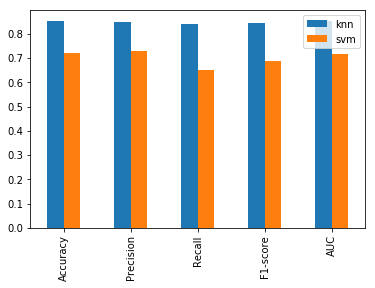

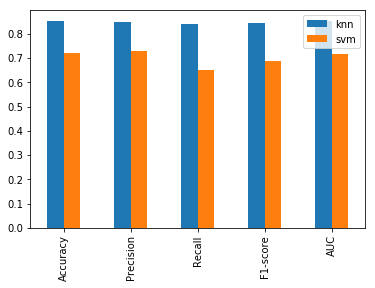

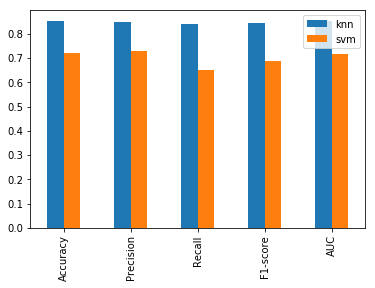

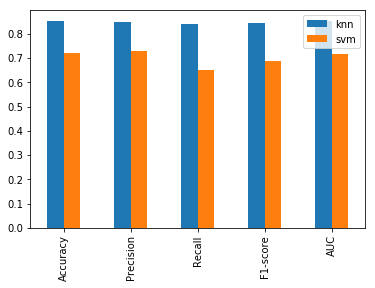

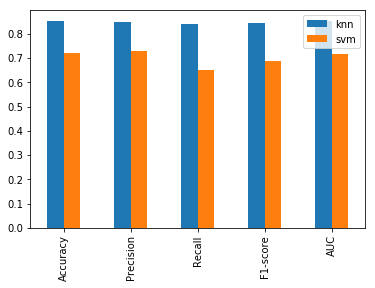

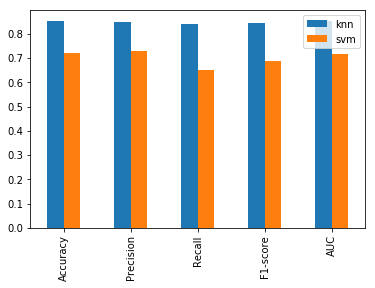

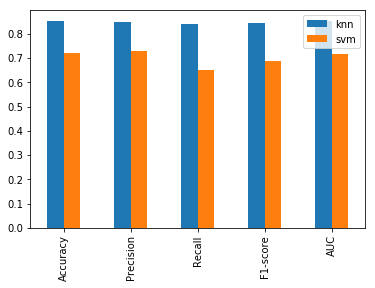

In [20]:
import matplotlib.pyplot as plt
plt.figure();
d = {'knn' : pd.Series([accuracy_knn / 10, precision_knn / 10, recall_knn / 10, f1score_knn / 10, auc_knn / 10], index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'])
    ,'svm' : pd.Series([accuracy_svm / 10, precision_svm / 10, recall_svm / 10, f1score_svm / 10, auc_svm / 10], index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'])
    }
df2 = pd.DataFrame(d, columns=['knn', 'svm'])
df2.plot.bar()
plt.show()